# **Baixar as bibliotecas**

In [1]:
from time import time
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle 

# **Carregar e normalizar os dados**

In [2]:
t0 = time()

#Carregar o arquivo original
xx = pd.read_excel(r"C:\Users\gusta\Desktop\Laboratorio\Rede Atualizada\Analisando metricas\T1T2T3T4T5T6PRPVPRCJPRFZNAPV.xlsx",engine='openpyxl')

#Fazer uma copia dos dados de 'xx' para fazer a normalização dos dados
x = xx.copy()

#Normalizar os dados
grupo = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'PRPV','PRCJ','PRFZ', 'NAPV']
for column in grupo: 
    x[column] = x[column]  / x[column].max()

# **Separar os dados**

In [3]:
#Dados totais
entrada = np.array(x[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'PRPV','PRCJ','PRFZ']],dtype='float32')
saida = np.array(x['NAPV'],dtype='float32')

#Formatação dos 10% dos dados
namostra, nvariavel = entrada.shape 
nteste = int(0.1*namostra) + 1 
ntreino = namostra - nteste 

entrada_10 = entrada[ntreino:namostra,:]
saida_des = np.array(x['NAPV'],dtype='float32')
saida_des_treino = saida_des[0:ntreino]
saida_10 = saida_des[ntreino:namostra]

# **Carregar modelo**
Adicionar o arquivo "rmse-0.12498190253973007-n15-e1000-t0.01.pkl" na pasta e depois mude o nome dele para "model.pk"

In [23]:
import pickle

def carregar_modelo(nome):
    filename = nome
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

modelo = carregar_modelo(r'n1000.pkl')

#Predições 
teste1 = modelo.predict(entrada_10) #10% dos dados
teste2 = modelo.predict(entrada) #Geral

11/11 [==============================] - 0s 1ms/step


# **Descobrir RMSE**

In [75]:
from sklearn.metrics import mean_squared_error 
def calcular_rmse(real,predicao):
    eqm = mean_squared_error(real,predicao) 
    ermse = np.sqrt(eqm)
    return ermse

#Fazer predição para os dados de 10%
print('RMSE de 10% dos dados: ',calcular_rmse(saida_10,teste1))
print('RMSE de toda a serie: ',calcular_rmse(saida,teste2))

RMSE de 10% dos dados:  0.1460441
RMSE de toda a serie:  0.10853947


# **Descobrir MSE**


In [76]:
from sklearn.metrics import mean_squared_error 
print('MSE de 10% dos dados: ',mean_squared_error(saida_10,teste1))
print('MSE de toda a serie: ',mean_squared_error(saida,teste2))

MSE de 10% dos dados:  0.02132888
MSE de toda a serie:  0.011780817


# **Descobrir R2**

In [77]:
from sklearn.metrics import r2_score
print('R2 de 10% dos dados: ',r2_score(saida_10,teste1))
print('R2 de toda a serie: ',r2_score(saida,teste2))

R2 de 10% dos dados:  0.5959575006732496
R2 de toda a serie:  0.7658864977734824


# **Descobrir o MAE**

In [5]:
from sklearn.metrics import mean_absolute_error
print('R2 de 10% dos dados: ', mean_absolute_error(saida_10,teste1))
print('R2 de toda a serie: ', mean_absolute_error(saida,teste2))

R2 de 10% dos dados:  0.10825926
R2 de toda a serie:  0.07649677


# **Descobrir PBIAS**

In [24]:
def pbias(original,pred):
    pb = np.mean((pred - original) / original) * 100
    return pb
print('R2 de 10% dos dados: ', pbias(saida_10,teste1))
print('R2 de toda a serie: ', pbias(saida,teste2))

R2 de 10% dos dados:  46.06987535953522
R2 de toda a serie:  27.569830417633057


# **Salvar os dados da predição da rede**

In [9]:
salvar = teste2*xx['NAPV'].max()
df = pd.DataFrame(salvar, columns=['NAPV'])
df.to_excel('predicao.xlsx', index=False)

# **Exibir os dados**


**namostra:** Valor numerico da quantidade total de informações presente no banco de dados

**nvariavel:** Valor númerico da quantidade total de variaveis presente no banco de dados

**nteste:** É o valor de 10% das informações presente no banco de dados

**ntreino:** É o valor do restante (90%) do banco de dados

**saida_teste:** 10% dos dados presentes no banco de dados

**teste_a:** Pegar os 10% dos dados previstos pela rede

In [27]:
#Dados reais
namostra, nvariavel = entrada.shape 
nteste = int(0.1*namostra) + 1 
ntreino = namostra - nteste 
saida_teste = saida[ntreino:namostra] 

#Dados previstos pela rede
teste_a = teste2[ntreino:namostra]

In [28]:
enttreino = entrada[0:ntreino,:] 
print(enttreino.shape)

(303, 9)


Exibir essas informações mostrando os valores reais e os que a rede previu

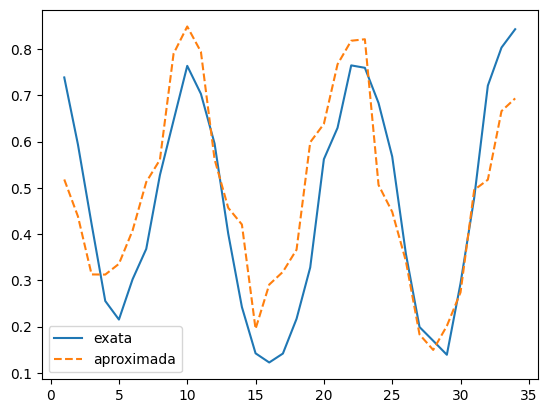

In [29]:

t = np.linspace(1,nteste,nteste)

import matplotlib.pyplot as plt

plt.plot(t,saida_teste,t,teste_a,'--')
plt.legend(('exata','aproximada'))
plt.show()